In [37]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [38]:
X,Y = load_coffee_data()

print(X.shape, Y.shape)

(200, 2) (200, 1)


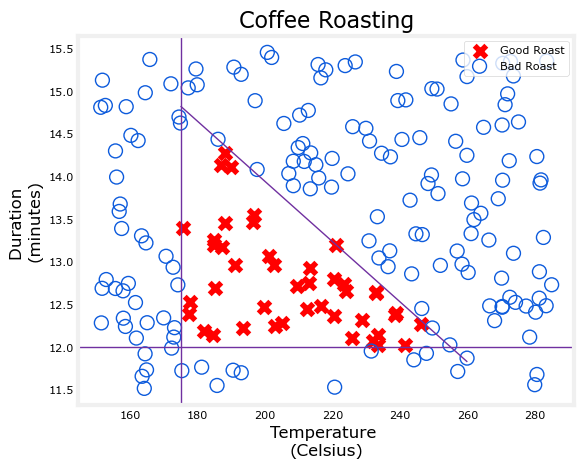

In [39]:
plt_roast(X,Y)

In [40]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
# norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l  = tf.keras.layers.experimental.preprocessing.Normalization(axis = -1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


#### https://blog.csdn.net/qq_38669138/article/details/79085700 np.tile()用法

In [41]:
Xt = np.tile(Xn, (1000,1))
Yt = np.tile(Y, (1000,1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [42]:
tf.random.set_seed(1234)

model = Sequential([tf.keras.Input(shape = (2,)),
                    Dense(3,activation = 'sigmoid',name = 'layer1'),
                    Dense(1,activation = 'sigmoid',name = 'layer2')
                    ])

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 3)                 9         
_________________________________________________________________
layer2 (Dense)               (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [44]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params)

L1 params =  9 , L2 params =  4


#### np.array() 矩阵一维和二维np.dot 和 相乘的法则 https://blog.csdn.net/qq_44232548/article/details/120332192


In [45]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.08 -0.3   0.18]
 [-0.56 -0.15  0.89]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[-0.43]
 [-0.88]
 [ 0.36]] 
b2(1,): [0.]


In [46]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 1s 193us/step - loss: 0.2662
Epoch 2/10
6250/6250 [==============================] - 1s 195us/step - loss: 0.1197
Epoch 3/10
6250/6250 [==============================] - 1s 197us/step - loss: 0.0664
Epoch 4/10
6250/6250 [==============================] - 1s 195us/step - loss: 0.0180
Epoch 5/10
6250/6250 [==============================] - 1s 190us/step - loss: 0.0115
Epoch 6/10
6250/6250 [==============================] - 1s 193us/step - loss: 0.0080
Epoch 7/10
6250/6250 [==============================] - 1s 194us/step - loss: 0.0056
Epoch 8/10
6250/6250 [==============================] - 1s 194us/step - loss: 0.0040
Epoch 9/10
6250/6250 [==============================] - 1s 195us/step - loss: 0.0029
Epoch 10/10
6250/6250 [==============================] - 1s 194us/step - loss: 0.0022


In [47]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ -0.13  14.3  -11.1 ]
 [ -8.92  11.85  -0.25]] 
b1: [-11.16   1.76 -12.1 ]
W2:
 [[-45.71]
 [-42.95]
 [-50.19]] 
b2: [26.14]


# robustness means 

Reliability is the probability that a system will perform in a satisfacto- ry manner for a given period when it is used under specified operat- ing conditions. Robustness is the measure or extent of a system's abili- ty to continue to function despite faults in its sub- systems or parts.

In [49]:
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

In [50]:
X_test = np.array([[200,13.9],
                   [200,17]])

X_testn = norm_l(X_test) # normalization

predictions = model.predict(X_testn)

print("predictions = \n", predictions)

predictions = 
 [[5.00e-01]
 [1.87e-18]]


In [52]:
yhat = np.zeros_like(predictions) # 和prediction 矩阵一样

yhat

array([[0.],
       [0.]], dtype=float32)

In [62]:
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [63]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


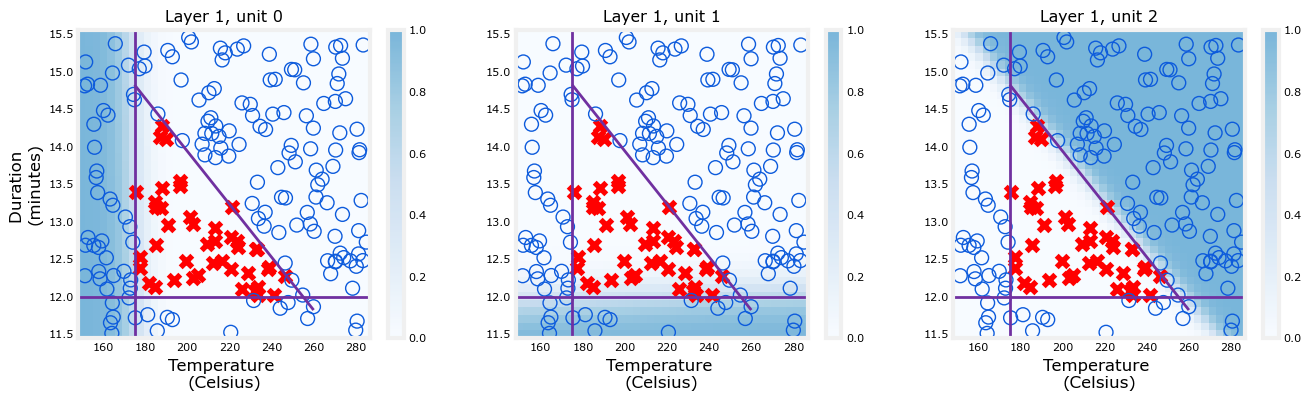

In [69]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

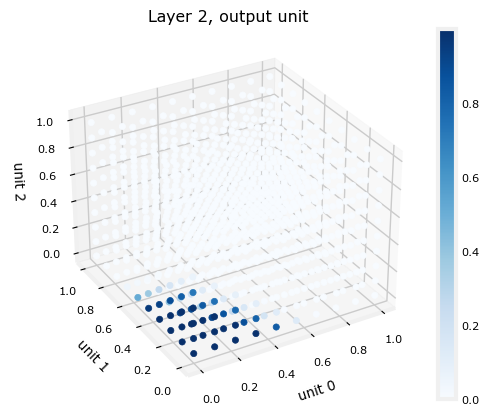

In [70]:
plt_output_unit(W2,b2)

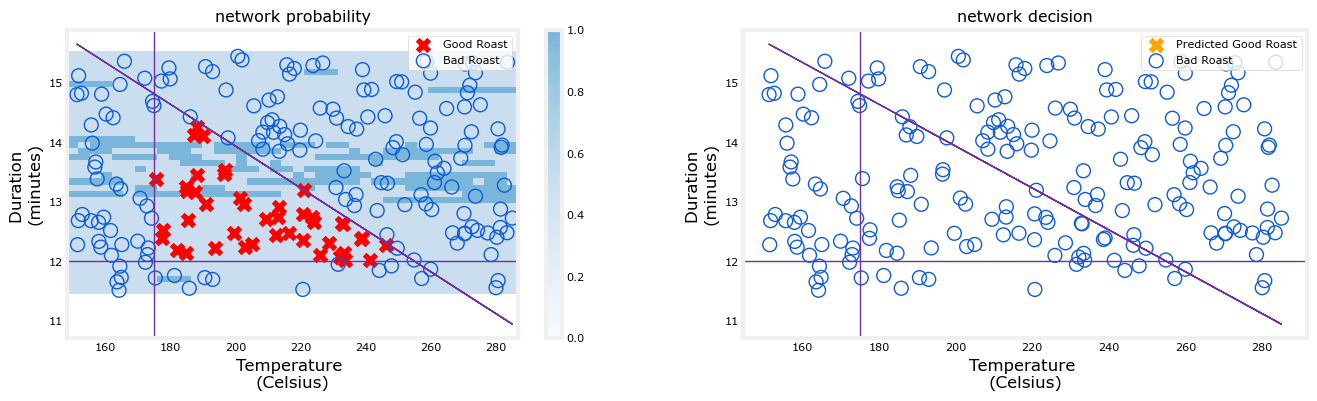

In [71]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)